WIP: Plot hypergraph as sets connecting nodes. Inspired by PoahVis and UpSet.

In [2]:
%reload_ext autoreload
%autoreload 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
data = pd.read_csv('models/gpt3/hypergraph.csv', dtype='category')

data['edge'] = 1.0
adj = data.pivot(columns='construct', values='edge', index='task')
adj.fillna(0, inplace=True)

x, y = np.where(adj == 1.0)

In [11]:
tasks = data['task'].unique()
constructs = data['construct'].unique()

n_tasks = len(tasks) # y
n_constructs = len(constructs) # y

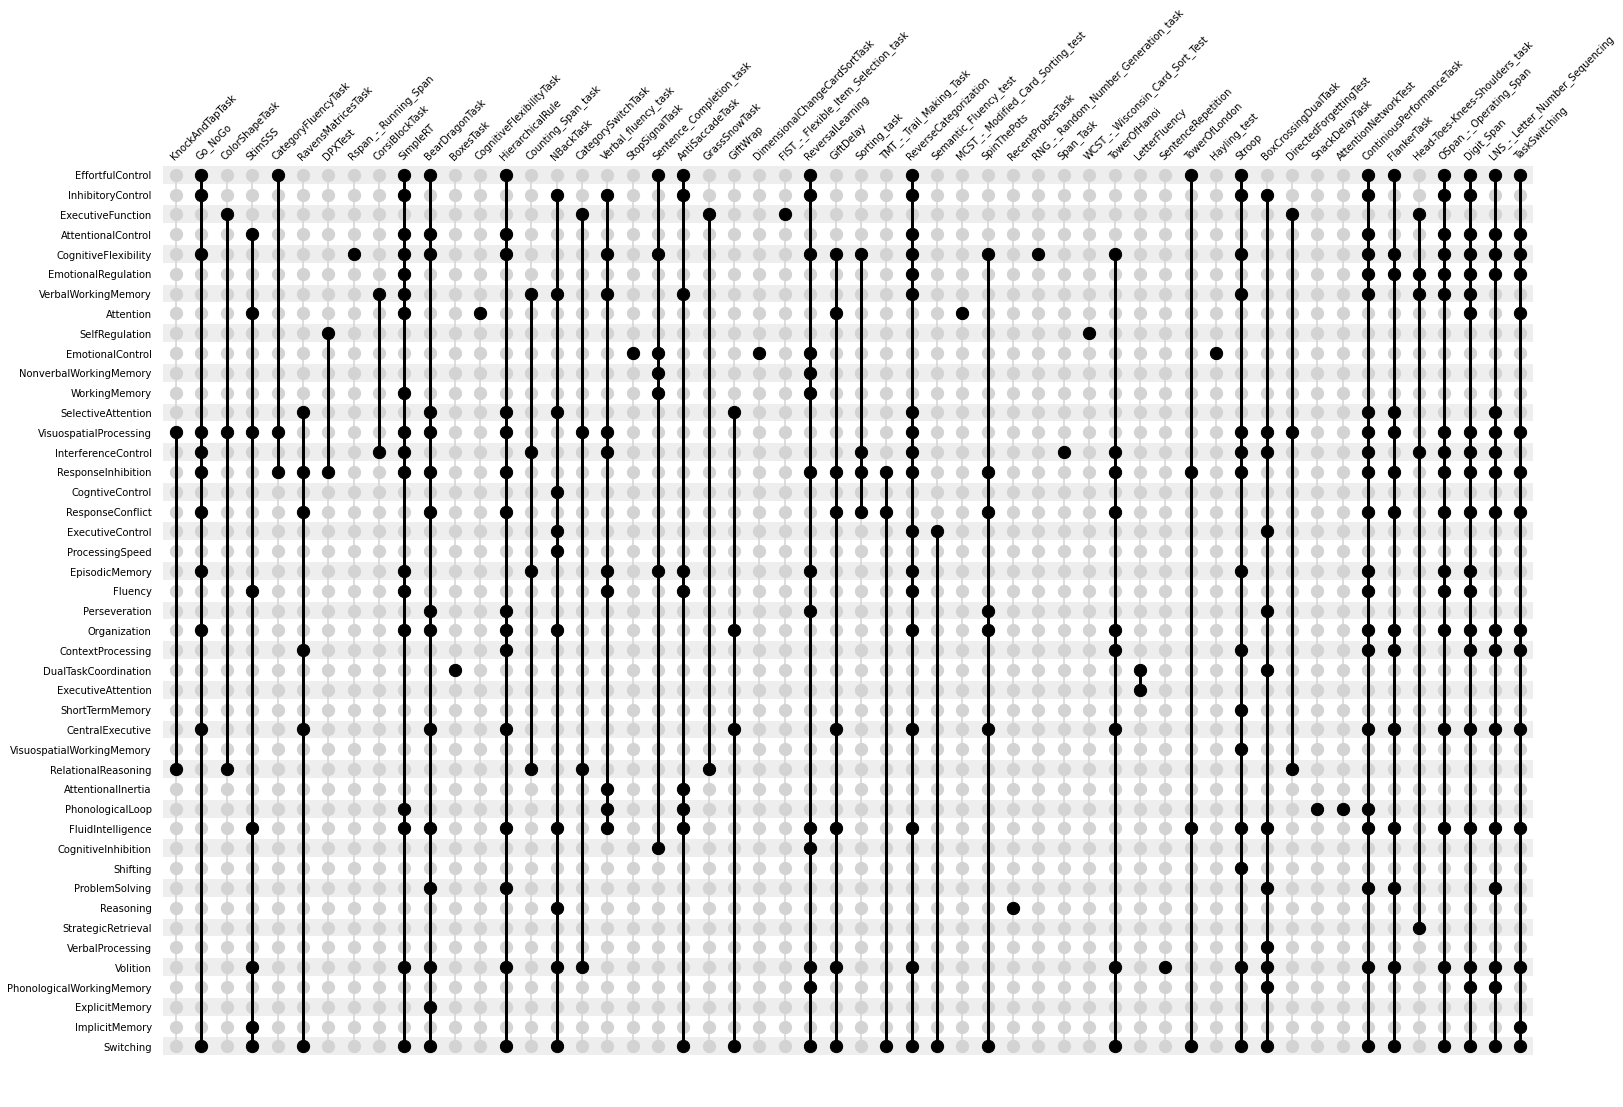

In [109]:
grid = np.mgrid.__getitem__([slice(0, n_tasks, 1), slice(0, n_constructs, 1)]).reshape(2,-1).T
grid_df = pd.DataFrame(grid, columns=['x','y'])

fig, ax = plt.subplots(figsize=(n_tasks / 2, n_constructs / 2.5))

ax.scatter(grid_df['x'], grid_df['y'], s=150, color='lightgray', zorder=1)

for xi in range(n_tasks):
    ax.plot([xi,xi], [0,n_constructs-1], color='lightgray', zorder=2)

ax.scatter(x, y, color='black', s=150, zorder=3)

for i in range(n_tasks):
    i_idx = np.where(x==i)
    _x = y[i_idx]
    ax.plot([i, i],
            [_x.min(),_x.max()],
             lw=3, color='black',zorder=4)

# shading
for i in range(0, n_constructs, 2):
    rect = plt.Rectangle((-.5, i-.45), n_tasks, .9, facecolor='#eee', lw=0, zorder=0)
    ax.add_patch(rect)

ax.xaxis.tick_top()
ax.invert_yaxis()

ax.grid(False)
ax.set_frame_on(False)

ax.tick_params(axis='both', which='both',length=0)

plt.xticks(range(n_tasks))
plt.yticks(range(n_constructs))


[t.set_y(.955) for t in ax.xaxis.get_ticklabels()]
[t.set_x(0.04) for t in ax.yaxis.get_ticklabels()]

ax.set_xticklabels(tasks)
ax.set_yticklabels(constructs)

plt.xticks(rotation=45, ha='left', rotation_mode='anchor')

plt.show()

In [106]:
# the following shows that labels are incorrect
data.query('task == "KnockAndTapTask"')

,task,construct,edge
0,KnockAndTapTask,EffortfulControl,1.0
1,KnockAndTapTask,InhibitoryControl,1.0
2,KnockAndTapTask,ExecutiveFunction,1.0
3,KnockAndTapTask,AttentionalControl,1.0
4,KnockAndTapTask,CognitiveFlexibility,1.0
5,KnockAndTapTask,EmotionalRegulation,1.0
6,KnockAndTapTask,VerbalWorkingMemory,1.0
7,KnockAndTapTask,Attention,1.0
8,KnockAndTapTask,SelfRegulation,1.0
9,KnockAndTapTask,EmotionalControl,1.0
